In [11]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

This model uses a neural network and GridSearchCV to predict share price impacts of Interest changes

# Read the CSV and Perform Basic Data Cleaning

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
df_stock1 = pd.read_csv("../../static/data/cba.csv")
# Drop the null columns where all values are null
df_stock2 = df_stock1.dropna(axis='columns', how='all')
# Drop the null rows
df_stock3 = df_stock2.dropna()
# Drop the last rows to test prediction to actual
df_stock_less1= df_stock3.iloc[:-1,:]
# Drop last 3 columns Sentiment RBA FED
N=3
df = df_stock_less1.iloc[: , :-N]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/01/2000,26.088652,26.088652,26.088652,26.088652,7.993308,0
1,4/01/2000,26.058813,26.058813,25.720646,25.790268,7.901886,1018072
2,5/01/2000,25.353634,25.392424,25.113932,25.213392,7.725136,2191283
3,6/01/2000,25.362585,25.362585,24.666357,24.716087,7.572770,1505531
4,7/01/2000,24.913021,25.113932,24.735979,24.964741,7.648952,1414040


In [14]:
df.shape

(5673, 7)

# Create a Train Test Split

Use `RBA` and "FED' for the y values

In [15]:
X = df.drop("Date", axis=1)
y = df_stock_less1.iloc[:,8:]
print(X.shape, y.shape)

(5673, 6) (5673, 2)


In [16]:
y

,RBA,FED
0,4.98,5.87
1,4.98,5.87
2,4.98,5.87
3,4.98,5.87
4,4.98,5.87
...,...,...
5668,0.05,0.08
5669,0.05,0.08
5670,0.05,0.08
5671,0.05,0.08


In [17]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
X_train.head()

,Open,High,Low,Close,Adj Close,Volume
685,31.817612,31.827559,31.559013,31.588852,10.852307,2005953
2196,41.375824,41.694099,40.977982,41.574749,19.670418,5205993
4502,75.269997,75.959999,75.160004,75.800003,61.686932,4751356
789,27.520891,27.630299,27.282185,27.351807,9.642457,2250677
3244,53.619488,54.902538,53.619488,54.763290,34.299412,5046859


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [19]:
# Scale your X data
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
y_scaler = MinMaxScaler().fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
y_train_scaled

array([[0.65373961, 0.25953079],
       [1.        , 0.30058651],
       [0.20360111, 0.15102639],
       ...,
       [0.27285319, 0.0058651 ],
       [0.85734072, 0.96480938],
       [0.01800554, 0.00146628]])

In [21]:
y_train_scaled

array([[0.65373961, 0.25953079],
       [1.        , 0.30058651],
       [0.20360111, 0.15102639],
       ...,
       [0.27285319, 0.0058651 ],
       [0.85734072, 0.96480938],
       [0.01800554, 0.00146628]])

In [22]:
print(X_train_scaled.shape, y_train.shape)
df_y_train = pd.DataFrame(y_train)
df_y_train

(4254, 6) (4254, 2)


,RBA,FED
685,4.75,1.81
2196,7.25,2.09
4502,1.50,1.07
789,4.75,1.33
3244,3.50,0.09
...,...,...
905,4.75,1.45
5192,0.14,0.05
3980,2.00,0.08
235,6.22,6.62


# Select your features (columns)

In [23]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(X_train_scaled)
selector.fit_transform(y_train_scaled)
print(X_train_scaled.shape, y_train_scaled.shape)

(4254, 6) (4254, 2)


In [24]:
#In X keep only columns "Close"
X_train_featured = X_train_scaled[:,[0,1,2,3,4,5]]
X_test_featured = X_test_scaled[:,[0,1,2,3,4,5]]
X_train_featured_df = pd.DataFrame(X_train_featured)
X_train_featured_df 

,0,1,2,3,4,5
0,0.107318,0.105679,0.107083,0.104551,0.037876,0.056327
1,0.216453,0.218282,0.215309,0.218400,0.125035,0.146184
2,0.603455,0.609346,0.608068,0.608603,0.540331,0.133418
3,0.058258,0.057777,0.057942,0.056244,0.025918,0.063199
4,0.356251,0.369025,0.360563,0.368763,0.269630,0.141715
...,...,...,...,...,...,...
4249,0.087671,0.090014,0.090284,0.090490,0.039368,0.057272
4250,0.421567,0.420010,0.418365,0.416952,0.474811,0.093071
4251,0.686154,0.684473,0.678727,0.675612,0.503781,0.108644
4252,0.094940,0.095917,0.094169,0.097520,0.029015,0.031537


In [25]:
print(X_train_scaled.shape, y_train_scaled.shape)
print(X_test_scaled.shape, y_test_scaled.shape)

(4254, 6) (4254, 2)
(1419, 6) (1419, 2)


# Train the Model

In [26]:
# Created a normal neural network with 6 inputs, 4 hidden nodes, and 2 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=6))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 100)               700       
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 2)                 202       
                                                                 
Total params: 31,244
Trainable params: 31,244
Non-traina

In [27]:
# Compile the model
# YOUR CODE HERE
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
y_train_scaled.reshape(-1, 1)
y_test_scaled.reshape(-1, 1)

print(X_train_scaled.shape, y_train_scaled.shape)
print(X_test_scaled.shape, y_test_scaled.shape)

(4254, 6) (4254, 2)
(1419, 6) (1419, 2)


In [29]:
# Fit the model to the training data
# YOUR CODE HERE

model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
133/133 - 0s - loss: 0.6251 - accuracy: 0.7315 - 477ms/epoch - 4ms/step
Epoch 2/100
133/133 - 0s - loss: 109.3903 - accuracy: 0.5703 - 113ms/epoch - 849us/step
Epoch 3/100
133/133 - 0s - loss: 2099.4265 - accuracy: 0.5644 - 96ms/epoch - 724us/step
Epoch 4/100
133/133 - 0s - loss: 16649.5469 - accuracy: 0.5616 - 96ms/epoch - 720us/step
Epoch 5/100
133/133 - 0s - loss: 44491.3320 - accuracy: 0.5621 - 95ms/epoch - 715us/step
Epoch 6/100
133/133 - 0s - loss: 112091.4844 - accuracy: 0.5663 - 112ms/epoch - 843us/step
Epoch 7/100
133/133 - 0s - loss: 332057.9375 - accuracy: 0.5733 - 92ms/epoch - 691us/step
Epoch 8/100
133/133 - 0s - loss: 1022482.4375 - accuracy: 0.5611 - 95ms/epoch - 714us/step
Epoch 9/100
133/133 - 0s - loss: 1136644.1250 - accuracy: 0.5574 - 97ms/epoch - 731us/step
Epoch 10/100
133/133 - 0s - loss: 2527901.7500 - accuracy: 0.5545 - 94ms/epoch - 707us/step
Epoch 11/100
133/133 - 0s - loss: 2089907.7500 - accuracy: 0.5625 - 92ms/epoch - 693us/step
Epoch 12/100
13

In [ ]:
model_loss, model_accuracy = model.evaluate(X_train_scaled, y_train_scaled, verbose=2)
print(f"Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

133/133 - 0s - loss: 29345470464.0000 - accuracy: 0.2005 - 218ms/epoch - 2ms/step
Neural Network - Loss: 29345470464.0, Accuracy: 0.20051716268062592


In [30]:
print(f"Training Data Score: {model.evaluate(X_train_scaled, y_train_scaled)}")
print(f"Testing Data Score: {model.evaluate(X_test_scaled, y_test_scaled)}")

133/133 [==============================] - 0s 645us/step - loss: 2006243584.0000 - accuracy: 0.2005
Training Data Score: [2006243584.0, 0.20051716268062592]
45/45 [==============================] - 0s 684us/step - loss: 2004028800.0000 - accuracy: 0.2121
Testing Data Score: [2004028800.0, 0.21212121844291687]


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_stock1 = pd.read_csv("../../static/data/cba.csv")#,index_col="Date",parse_dates=True)
# Drop the null columns where all values are null
df_stock2 = df_stock1.dropna(axis='columns', how='all')
# Drop the null rows
df_stock3 = df_stock2.dropna()
# Drop the last rows to test prediction to actual
df_stock_less1= df_stock3.iloc[:-1,:]

# SET X and y
# Drop last 3 columns Sentiment RBA FED
N=3
df = df_stock_less1.iloc[: , :-N]

X_data = df.drop("Date", axis=1)
y_target = df_stock_less1.iloc[:,9:]
print(X_data.shape, y_target.shape)
X_data

(5673, 6) (5673, 1)


,Open,High,Low,Close,Adj Close,Volume
0,26.088652,26.088652,26.088652,26.088652,7.993308,0
1,26.058813,26.058813,25.720646,25.790268,7.901886,1018072
2,25.353634,25.392424,25.113932,25.213392,7.725136,2191283
3,25.362585,25.362585,24.666357,24.716087,7.572770,1505531
4,24.913021,25.113932,24.735979,24.964741,7.648952,1414040
...,...,...,...,...,...,...
5668,105.019997,105.559998,104.639999,105.239998,105.239998,1347251
5669,105.650002,105.699997,104.900002,105.379997,105.379997,1740982
5670,105.800003,107.120003,105.750000,106.879997,106.879997,1515505
5671,106.790001,107.080002,106.000000,106.709999,106.709999,1334658


In [49]:
#In X_data keep only featured cols 

X_data_featured = X_data.iloc[:,[1,2,3,4,5]]
print(X_data_featured.shape,y_target.shape)

(5673, 5) (5673, 1)


In [50]:
# Split data and target into training and testing
from sklearn.model_selection import train_test_split
X_data_train, X_data_test, y_target_train, y_target_test = train_test_split(X_data,y_target,test_size=0.4,random_state=42)
print(X_data_train.shape,y_target_train.shape)
print(X_data_test.shape,y_target_test.shape)

(3403, 6) (3403, 1)
(2270, 6) (2270, 1)


In [64]:
y_target_train.dtypes

FED    float64
dtype: object

In [65]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_data_train)
X_data_train_scaled = X_scaler.transform(X_data_train)
X_data_test_scaled = X_scaler.transform(X_data_test)

y_scaler = MinMaxScaler().fit(y_target_train)
y_target_train_scaled = y_scaler.transform(y_target_train)
y_target_test_scaled = y_scaler.transform(y_target_test)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [67]:

model_params = {
    'n_neighbors' : {
        'model' : KNeighborsClassifier(),
        'params' : {
           'n_neighbors': [3,5,11,19],
           'weights': ['uniform','distance']
        }
    },
    'svm' : {
        'model' : svm.SVC(),
        'params' : {
            'C' : [1,5,10,50],
            'kernel': ['rbf','linear'],
            'gamma': [0.0001, 0.0005, 0.001, 0.005]
        }
    },
    'random_forest': {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,50,80],
            'max_features': ['auto','sqrt'],
            'max_depth': [2,4],
            'min_samples_split': [2,5],
            'min_samples_leaf': [1,2],
            'bootstrap': [True,False]
        }
    },
    'logistic_regression' : {
    'model' : LogisticRegression(solver='liblinear',multi_class='auto'),
    'params' : { 'C': [1,5,10,50]
    }
  }
}

In [68]:
from sklearn.model_selection import GridSearchCV
scores= []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_data_train_scaled, y_target_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_})

C:\Users\antoi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\antoi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antoi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\antoi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\antoi\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 381, in _fit
    check_classification_targets(y)
  File "C:\Users\antoi\anaconda3\lib\site-pac

ValueError: Unknown label type: 'continuous'

In [ ]:
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score

,model,best_score,best_params
0,n_neighbors,0.539657,"{'n_neighbors': 3, 'weights': 'distance'}"
1,svm,0.734144,"{'C': 50, 'gamma': 0.0001, 'kernel': 'linear'}"
2,random_forest,0.547882,"{'bootstrap': True, 'max_depth': 4, 'max_featu..."
3,logistic_regression,0.774389,{'C': 50}


In [ ]:
# Make predictions with the hypertuned model
predictions_clf = clf.predict(X_data_test_scaled)

from sklearn.metrics import classification_report
target_names = ["NEGATIVE 0","NEUTRAL 1","POSITIVE 2"] 
print(classification_report(y_target_test_encoded, predictions_clf, target_names=target_names))

              precision    recall  f1-score   support

  NEGATIVE 0       0.83      0.72      0.77      1042
   NEUTRAL 1       0.00      0.00      0.00        51
  POSITIVE 2       0.76      0.88      0.81      1177

    accuracy                           0.78      2270
   macro avg       0.53      0.53      0.53      2270
weighted avg       0.77      0.78      0.77      2270



C:\Users\antoi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\antoi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\antoi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


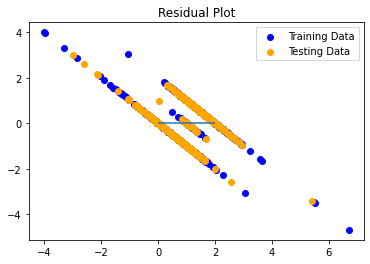

In [ ]:
# LinearRegression model: fit it to the scaled training data
from sklearn.linear_model import LinearRegression
modelLG1 = LinearRegression()
modelLG1.fit(X_data_train_scaled, y_target_train_encoded)

# Make predictions using fitted model
predictions1 = modelLG1.predict(X_data_test_scaled)

# Plotted the difference between the model predicted values and actual y values, versus the model predicted values
plt.scatter(modelLG1.predict(X_data_train_scaled), y_target_train_encoded - modelLG1.predict(X_data_train_scaled), c="blue", label="Training Data")
plt.scatter(modelLG1.predict(X_data_test_scaled), y_target_test_encoded - modelLG1.predict(X_data_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_target_test_encoded.min(), xmax=y_target_test_encoded.max())
plt.title("Residual Plot")
plt.show()

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'antoinetteboyle.sav'
joblib.dump(model, filename)

INFO:tensorflow:Assets written to: ram://eaffd8bb-9e6f-4c87-a605-1b1e126d58d9/assets


['antoinetteboyle.sav']